## Import ML Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Import ML Algorithms

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from scipy                   import stats

## Import Other Libraries

In [4]:
import os
import math
import statistics

## Set Styles of Libraries

#### Seaborn

In [5]:
sns.set_style( 'darkgrid' )

#### Pandas

In [6]:
pd.set_option( 'display.max_columns', None )

#### Environment

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [8]:
data_files_path = os.path.join( os.getcwd() + '', '..', '..', 'data', 'housing_prices', '' )
data_files      = os.listdir( data_files_path )
df              = []

In [9]:
for csv_file in data_files:
    if csv_file != '.ipynb_checkpoints':
        df.append( pd.read_csv( '../../data/housing_prices/' + csv_file ) )
        
print( data_files )

['test.csv', 'train.csv']


In [10]:
test_X, train_df = ( df[0], df[1] )
train_X, train_y = ( train_df.drop( ['SalePrice'], axis = 1 ), train_df[ 'SalePrice' ] )

In [11]:
train_X.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Features

- `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass` The building class
- `MSZoning` The general zoning classification
- `LotFrontage` Linear feet of street connected to property
- `LotArea` Lot size in square feet
- `Street` Type of road access
- `Alley` Type of alley access
- `LotShape` General shape of property
- `LandContour` Flatness of the property
- `Utilities` Type of utilities available
- `LotConfig` Lot configuration
- `LandSlope` Slope of property
- `Neighborhood` Physical locations within Ames city limits
- `Condition1` Proximity to main road or railroad
- `Condition2` Proximity to main road or railroad (if a second is present)
- `BldgType` Type of dwelling
- `HouseStyle` Style of dwelling
- `OverallQual` Overall material and finish quality
- `OverallCond` Overall condition rating
- `YearBuilt` Original construction date
- `YearRemodAdd` Remodel date
- `RoofStyle` Type of roof
- `RoofMatl` Roof material
- `Exterior1st` Exterior covering on house
- `Exterior2nd` Exterior covering on house (if more than one material)
- `MasVnrType` Masonry veneer type
- `MasVnrArea` Masonry veneer area in square feet
- `ExterQual` Exterior material quality
- `ExterCond` Present condition of the material on the exterior
- `Foundation` Type of foundation
- `BsmtQual` Height of the basement
- `BsmtCond` General condition of the basement
- `BsmtExposure` Walkout or garden level basement walls
- `BsmtFinType1` Quality of basement finished area
- `BsmtFinSF1` Type 1 finished square feet
- `BsmtFinType2` Quality of second finished area (if present)
- `BsmtFinSF2` Type 2 finished square feet
- `BsmtUnfSF` Unfinished square feet of basement area
- `TotalBsmtSF` Total square feet of basement area
- `Heating` Type of heating
- `HeatingQC` Heating quality and condition
- `CentralAir` Central air conditioning
- `Electrical` Electrical system
- `1stFlrSF` First Floor square feet
- `2ndFlrSF` Second floor square feet
- `LowQualFinSF` Low quality finished square feet (all floors)
- `GrLivArea` Above grade (ground) living area square feet
- `BsmtFullBath` Basement full bathrooms
- `BsmtHalfBath` Basement half bathrooms
- `FullBath` Full bathrooms above grade
- `HalfBath` Half baths above grade
- `Bedroom` Number of bedrooms above basement level
- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

## Explore the Data

#### Explore the Response

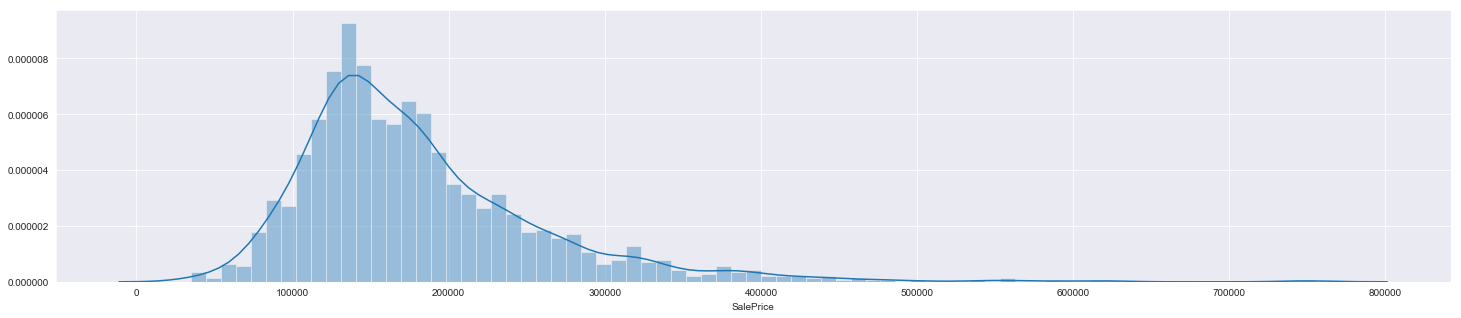

In [12]:
fig, ax = plt.subplots( figsize = ( 25, 5 ) )
sns.distplot( train_y, bins = 75 )

The response appears to be positively skewed with outliers.

#### Explore Numerical Data

###### Function

In [13]:
def get_numeric_indices( df ):
    indices = []

    # Start at index 1 because index 0 is the ID
    for i in range( 1, len( df.columns ) ):
        if df[ df.columns[i] ].dtype == 'int64' or\
           df[ df.columns[i] ].dtype == 'float64':
            indices.append(i)
            
    return indices

In [14]:
numerical_indices = get_numeric_indices( train_X )

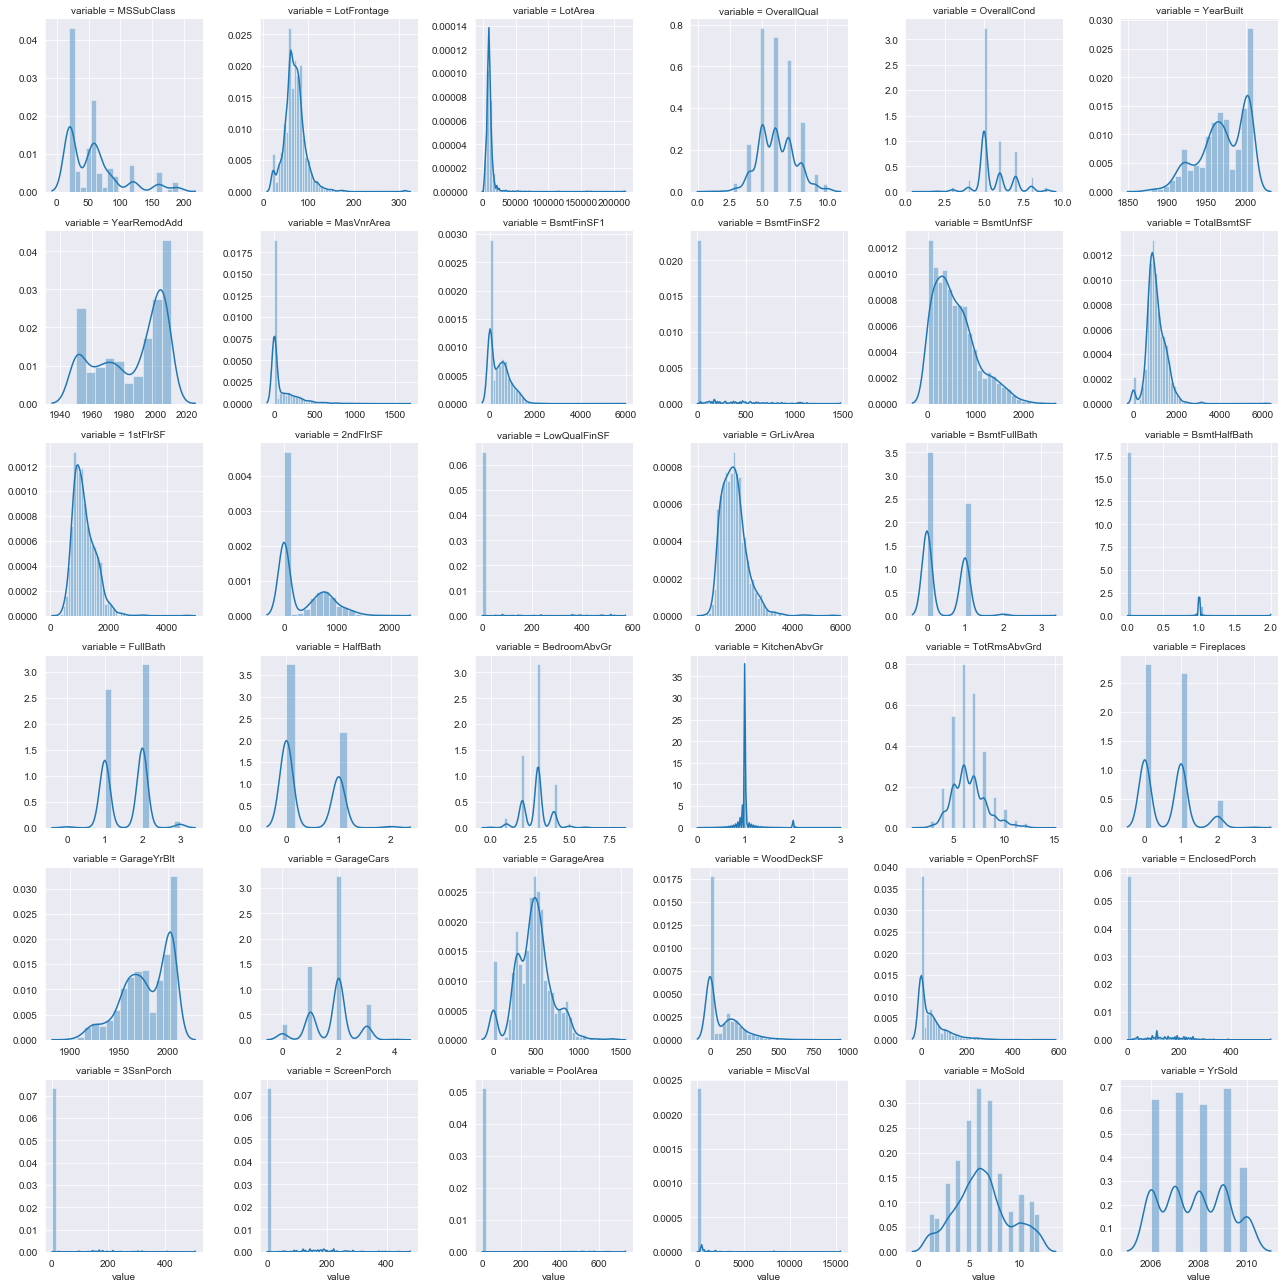

In [15]:
features       = pd.melt( train_X, value_vars = train_X[ train_X.columns[ numerical_indices ] ] )
numerical_grid = sns.FacetGrid( features, col = 'variable', col_wrap = 6, sharex = False, sharey = False )
numerical_grid = numerical_grid.map( sns.distplot, 'value' )

There are some variables with a positively skewed distribution:

- `LotFrontage`
- `LotArea`
- `BsmtUnfSF`
- `TotalBsmtSF`
- `1stFlrSF`
- `GrLivArea`
- `GarageArea`

Other Variables appear to be count data
- `BsmtFullBath`
- `BsmtHalfBath`
- `FullBath`
- `HalfBath`
- `BedroomAbvGr`
- `KitchenAbvGr`
- `TotalRmsAbvGr`
- `Fireplaces`
- `GarageCars`

Also note variable that should be made categorical, like time series or `MSSubClass`
- `MSSubClass`
- `YearBuilt`
- `YearRemodAdd`
- `GarageYrBlt`
- `MoSold`
- `YrSold`

It is also a good idea to consider numerical variables that have a lot of values set to 0.

###### Function

In [16]:
count_exempt = [ 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalRmsAbvGr', 'Fireplaces', 'GarageCars' ]

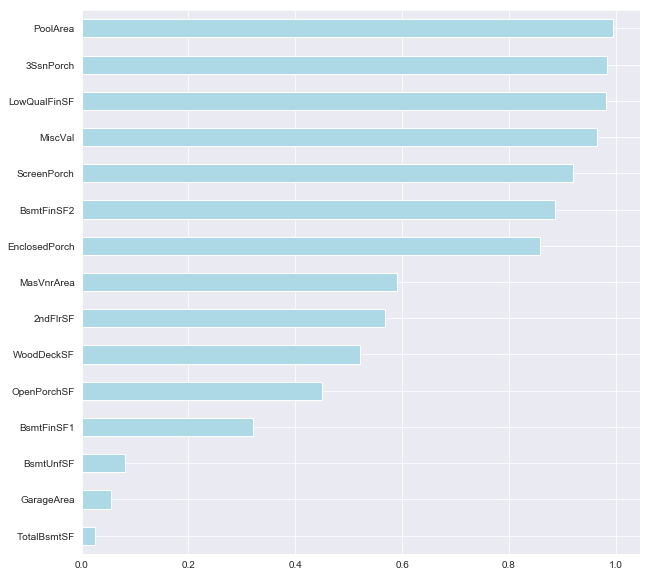

In [19]:
non_count_features = [ f for f in train_X.columns[ numerical_indices ] if f not in count_exempt ]
sparse_features   = ( train_X[ non_count_features ] == 0 ).sum() /\
                      train_X.shape[0]

sparse_features[sparse_features > 0].\
    sort_values(ascending=True).\
    plot(kind = 'barh', figsize = ( 10,10 ), color = 'lightblue')

From the above plot it is evident that some features have a large amount of sparsity.

#### Explore Categorical Data

For the features that have a form of rank to them we should consider making these values in an ordinal scale rather than category. These features include:

- `Alley`
- `LotShape`
- `LandContour`
- `Utilities`
- `LandSlope`
- `ExterQual`
- `ExterCond`
- `BsmtQual`
- `BsmtCond`
- `BsmtExposure`
- `BsmtFinType1`
- `BsmtFinType2`
- `HeatingQC`
- `KitchenQual`
- `Functional`
- `FireplaceQu`
- `GarageFinish`
- `GarageQuality`
- `GarageCond`
- `PavedDrive`
- `PoolQC`

###### Function

In [ ]:
def get_categorical_indices( df ):
    indices = []

    for i in range( 1, len( df.columns ) ):
        if df[ df.columns[i] ].dtype == 'object':
            indices.append(i)
            
    return indices

## Handle Missing Values

###### Function

In [11]:
def na_heatmap( df ):
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )

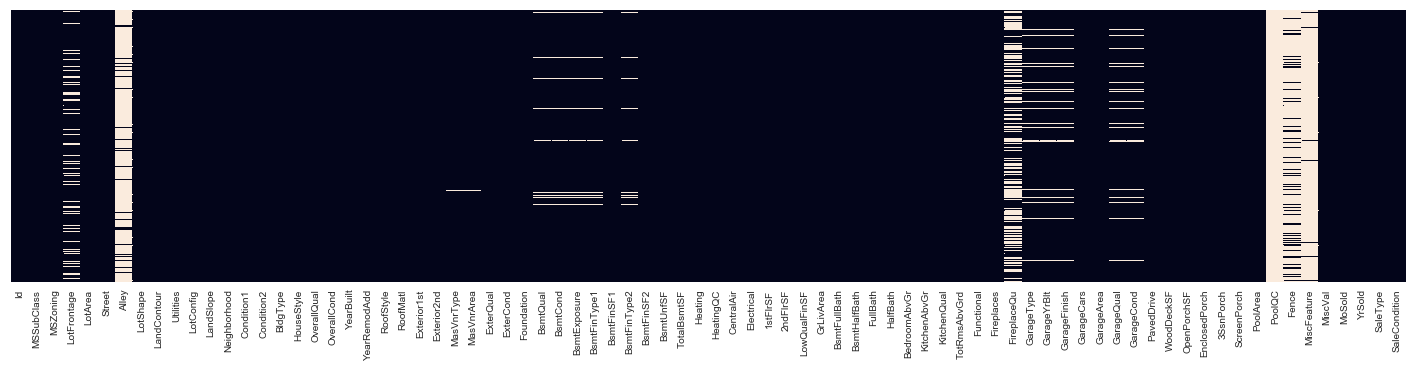

In [12]:
na_heatmap( train_X )

The features for `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, and `MiscFeature` is missing most of the data so it is best to drop these features.

###### Function

In [13]:
def drop_missing_features( df, threshold ):
    drop_columns = []
    na_count     = df.isna().sum()

    for i in range( len( na_count ) ):
        if ( na_count[i] / len( df ) ) > threshold:
            drop_columns.append( df.columns[i] )
            
    return drop_columns

In [14]:
train_X.drop( drop_missing_features( train_X, 0.45 ), axis = 1, inplace = True )

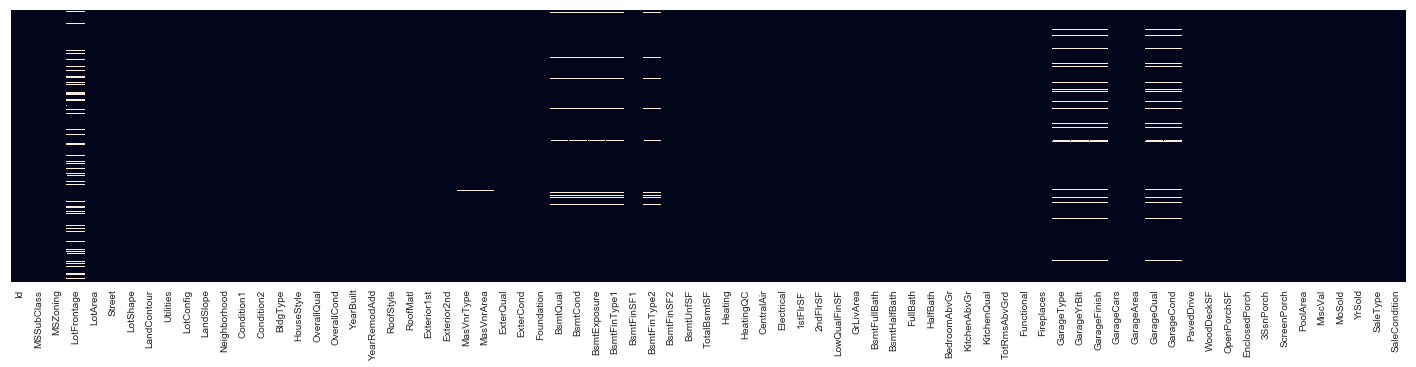

In [15]:
na_heatmap( train_X )

##### Get Data Types of Variables

###### Function

In [16]:
def get_data_types( df ):
    data_types = []

    for i in range( len( train_X.columns ) ):
        data_types.append( str( train_X.columns[i] ) + " " + str( train_X[ train_X.columns[i] ].dtype ) )
        data_types[ i ] = data_types[ i ].split(" ")

    data_types = pd.DataFrame( data_types )
    return data_types.transpose()

In [17]:
get_data_types( train_X )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object


##### Drop Categorical Features with Majority Class 

In [19]:
categorical_indices = get_categorical_indices( train_X )

###### Function

In [20]:
def drop_majority_class_columns( df, indices, threshold ):
    class_count  = None
    drop_columns = []

    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Categorical
        if i in indices:
            # Get Count of Feature's Each Unique Value
            drop_feature = False
            class_count  = df[ df.columns[i] ].value_counts()

            # For Every Unique Value
            for j in range( len( class_count ) ):
                # If the Unique Value is the Majority
                if ( class_count[j] / len( df ) ) > threshold:
                    # Drop the Feature Altogether
                    drop_feature = True
                    
            if drop_feature:
                drop_columns.append( df.columns[i] )
                
    return drop_columns

In [21]:
train_X.drop( drop_majority_class_columns( train_X, categorical_indices, 0.9 ), axis = 1, inplace = True )

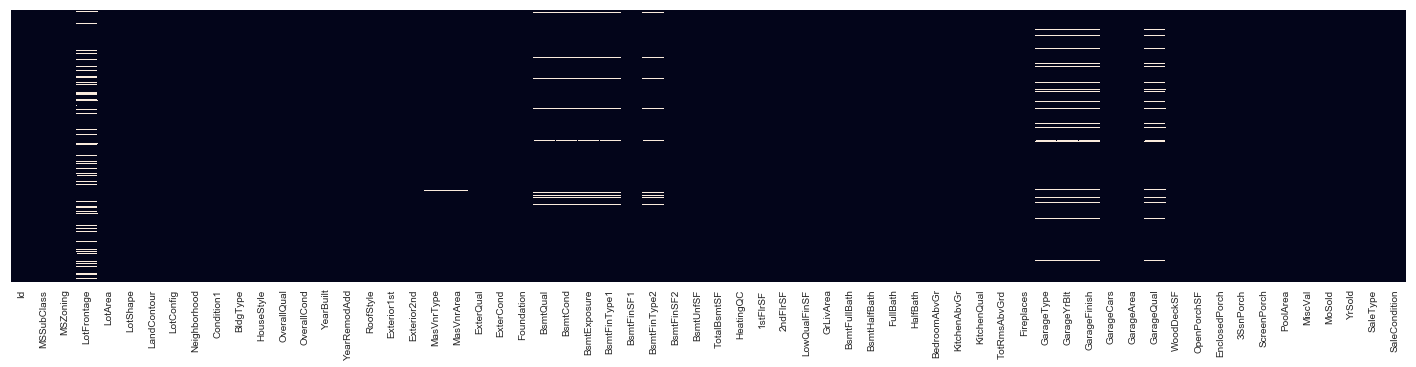

In [22]:
na_heatmap( train_X )

##### Impute Missing Categorical Data

In [23]:
def impute_categorical( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Categorical
        if i in indices:
            df[ df.columns[i] ].fillna( 'Other', inplace = True )

In [24]:
year_columns = [ 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt' ]

In [25]:
impute_categorical( train_X, categorical_indices )

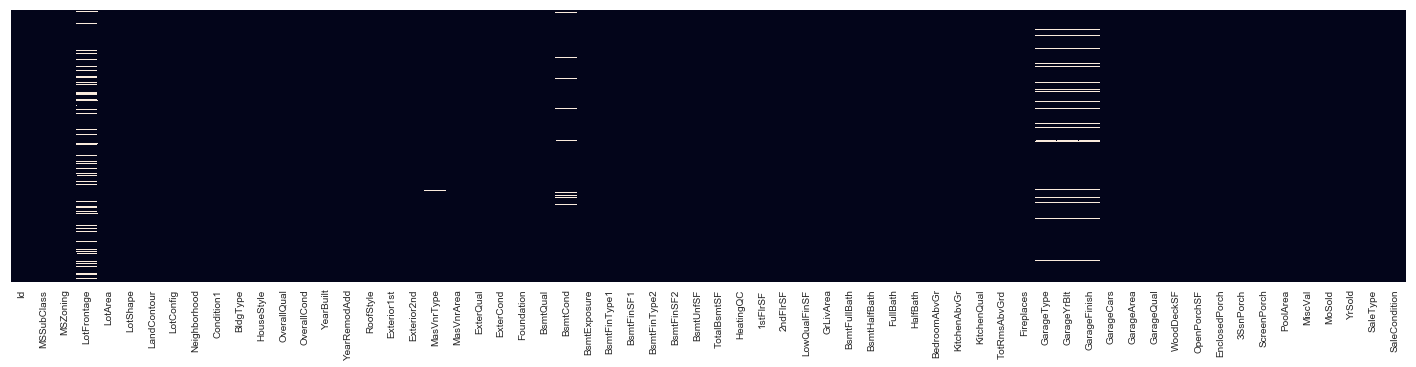

In [26]:
na_heatmap( train_X )

It looks like `GarageYrBlt` still has missing data. I will replace the missing values in that column with the value that at the media.

In [27]:
sorted_years       = train_X[ 'GarageYrBlt' ].sort_values()
garage_median_year = int( round( statistics.median( sorted_years ) ) )

train_X[ 'GarageYrBlt' ].fillna( garage_median_year, inplace = True )
garage_median_year

1984

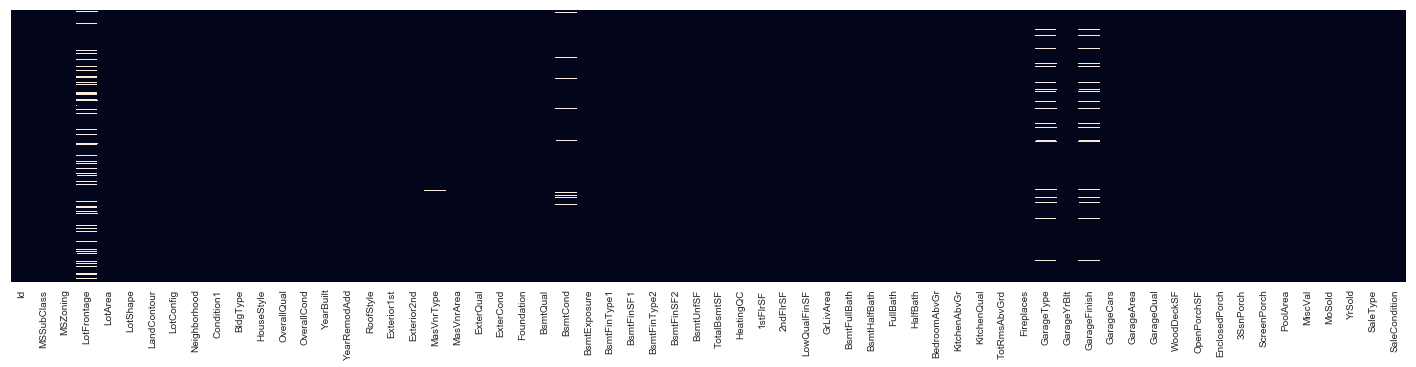

In [28]:
na_heatmap( train_X )

##### Transform Year Data into Categorical Data

Prior to transforming numerical data into categorical, it is best to identify the buckets in which to seperate the data. `YrSold` will be categorized as is since the housing recorded were sold between 2006 and 2010. `MoSold` will be categorized by quarter. The other three variables -  `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` - will be divided into buckets and then categorized as strings. These strings will then be transformed into dummy variables.

###### Function

In [29]:
int_list_to_string = lambda x : str( x )

def convert_year_to_category( df, feature, bins, names ):
    bins.insert( 0, 0 )
    
    df[ feature ] = pd.cut( df[ feature ], 
                            bins, 
                            labels = names, 
                            include_lowest = True ).astype( 'object' )

######  Categorize `YrSold`

In [30]:
bins  = list( set( train_X[ 'YrSold' ] ) )
names = list( map( int_list_to_string, bins ) )

In [31]:
convert_year_to_category( train_X, 'YrSold', bins, names )

###### Catergorize `MoSold`

In [32]:
bins  = [ 3, 6, 9, 12 ]
names = [ 'First', 'Second', 'Third', 'Fourth' ]

In [33]:
convert_year_to_category( train_X, 'MoSold', bins, names )

View of the other year data features to identify good bin ranges.

###### Function

In [34]:
def visualize_year_feature_dist( df, years ):
    for year in years:
        plt.figure( figsize = (24, 3) )
        plt.hist( df[year], bins = len( set( df[year] ) ) )
        plt.title( year )

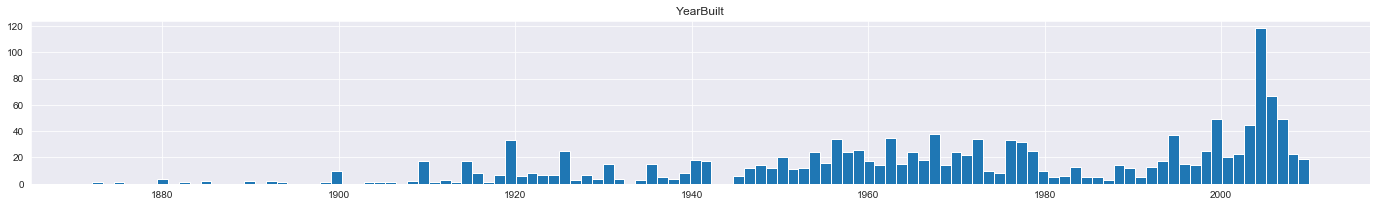

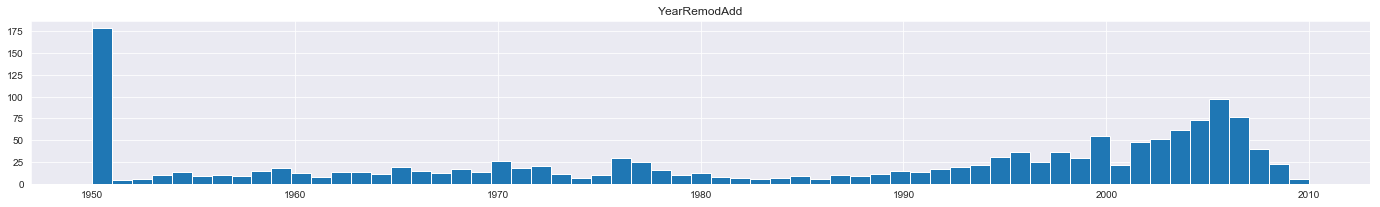

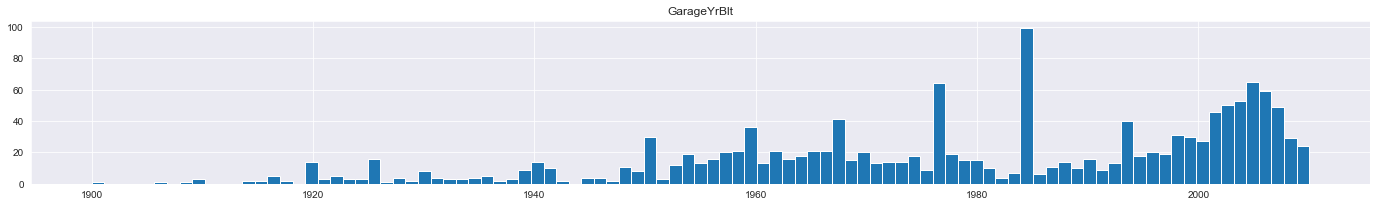

In [35]:
visualize_year_feature_dist( train_X, year_columns )

Based on the distribution of the data, good bin ranges for these features are as follows:

In [36]:
year_built      = [ '<1920', '1921 - 1940', '1941 - 1960', '1961 - 1980', '1981 - 2000', '2000>' ]
year_remod_add  = [ '1950',  '1951 - 1970', '1971 - 1980', '1981 - 1990', '1991 - 2000', '2000>' ]
garage_year_blt = [ '<1920', '1921 - 1945', '1946 - 1965', '1966 - 1985', '1986 - 2000', '2000>' ]

###### Categorize `YearBuilt`

In [37]:
bins  = [ 1920, 1940, 1960, 1980, 2000, np.inf ]
names = year_built

In [38]:
convert_year_to_category( train_X, 'YearBuilt', bins, names )

###### Categorize `YearRemodAdd`

In [39]:
bins  = [ 1950, 1970, 1980, 1990, 2000, np.inf ]
names = year_remod_add

In [40]:
convert_year_to_category( train_X, 'YearRemodAdd', bins, names )

###### Categorize `GarageYrBlt`

In [41]:
bins  = [ 1920, 1945, 1965, 1985, 2000, np.inf ]
names = garage_year_blt

In [42]:
convert_year_to_category( train_X, 'GarageYrBlt', bins, names )

##### Make Categorical Features Dummy Variables

###### Function

In [43]:
def make_dummy_features( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Feature is Categorical
        if i in indices:
            # Make Feature a Dummy Variable
            df[ df.columns[i] ] = pd.get_dummies( df[ df.columns[i] ], drop_first = True )

In [44]:
categorical_indices = get_categorical_indices( train_X )

In [45]:
make_dummy_features( train_X, categorical_indices )

In [46]:
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,0,0,7,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,706,0,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,1,0,1,2,548,0,0,61,0,0,0,0,0,0,0,0,0
1,2,20,0,80.0,9600,0,0,0,0,1,0,0,6,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,978,0,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,0,6,1,1,0,1,2,460,0,298,0,0,0,0,0,0,0,1,0,0
2,3,60,0,68.0,11250,0,0,0,0,0,0,0,7,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,486,0,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,0,6,1,1,0,1,2,608,0,0,42,0,0,0,0,0,0,0,0,0
3,4,70,0,60.0,9550,0,0,0,0,0,0,0,7,5,0,1,1,0,0,0,0,0,0,0,0,1,0,0,216,0,0,540,756,0,961,756,0,1717,1,0,1,0,3,1,0,7,1,0,0,0,3,642,0,0,35,272,0,0,0,0,0,0,0,0
4,5,60,0,84.0,14260,0,0,0,0,0,0,0,8,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,655,0,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,1,1,0,1,3,836,0,192,84,0,0,0,0,0,1,0,0,0


##### Get Numeric Indices

In [48]:
numerical_indices = get_numeric_indices( train_X )

##### Impute Numerical Feature with Missing Values

###### Function

In [49]:
def impute_numeric( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices:
            # Fill Missing Values with that Column's Mean
            column_mean = df[ df.columns[i] ].mean()
            df[ df.columns[i] ].fillna( column_mean, inplace = True )

In [50]:
impute_numeric( train_X, numerical_indices )

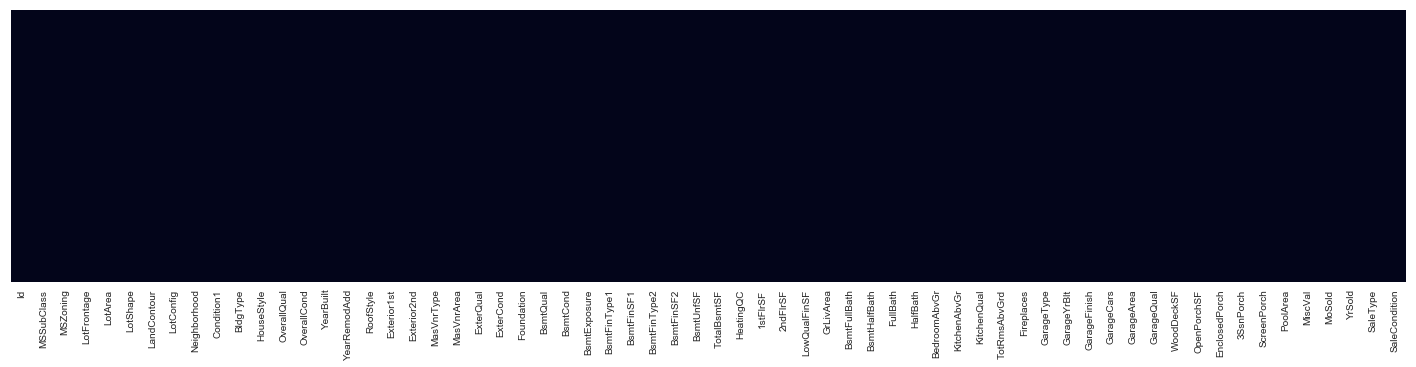

In [51]:
na_heatmap( train_X )

At this point all missing values for the numeric features have been imputed to be the mean value of all that feature's observations.

## Transform Test Data

##### Winsorize Data

###### Function

In [52]:
def winsor( df, indices, exempt_features = [] ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices and\
            df.columns[i] not in exempt_features:
                X_j                 = df[ df.columns[i] ]
                std_cutoff          = np.mean( X_j ) + ( 3 * np.std( X_j ) )
                sort_X_j            = X_j.sort_values( ascending = False )
                count_over_3_std    = len( sort_X_j[ sort_X_j > std_cutoff ] )
                perc_outside_3_std  = count_over_3_std / len( X_j )
                df[ df.columns[i] ] = stats.mstats.winsorize( X_j, limits = [0, perc_outside_3_std] )
                
                
def before_after_winsor( df, indices ):
    range_vector = []
    max_value    = 0
    min_value    = 0
    
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices:
            max_value = max( df[ df.columns[i] ] )
            min_value = min( df[ df.columns[i] ] )
            
            range_vector.append( max_value - min_value )
    
    return range_vector


def winsor_before_after_compare( df_1, df_2, indices ):
    before_winsor        = before_after_winsor( df_1, indices )
    after_winsor         = before_after_winsor( df_2, indices )
    before_after         = pd.DataFrame( [before_winsor, after_winsor], index = [ "Before", "After" ] )
    before_after.columns = df_1.columns[ indices ][ 0 : len( df_1.columns[ indices ] ) ]
    return before_after

I am going to compare the range difference between the before and after winsorization for the numerical feature values in the data. 

In [53]:
after_df          = train_X.copy( deep = True )
numerical_indices = get_numeric_indices( after_df )

In [54]:
winsor( after_df, numerical_indices )

By looking at the table it is evident that the range of values have been brought closer to a normal distribution. Some features were disregarded like features involving years.

In [55]:
after_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.691781,0.044521,69.608862,10087.391096,0.028082,0.034247,0.064384,0.001370,0.055479,0.021233,0.009589,6.099315,5.560274,0.167808,0.174658,0.781507,0.000685,0.002055,0.304795,0.001370,0.009589,0.019178,0.434247,0.023973,0.044521,0.091781,0.101370,440.426027,0.022603,37.799315,566.019178,1052.061644,0.033562,1159.015068,346.234247,2.35411,1508.808219,0.413699,0.0,1.565068,0.382877,2.859589,0.999315,0.026712,6.516438,0.609589,0.595890,0.194521,0.289041,1.767123,471.987671,0.032877,92.671918,45.233562,20.208904,0.378082,12.560274,0.0,25.269863,0.155479,0.225342,0.002740,0.002740
std,421.610009,41.672713,0.206319,19.455460,5205.361208,0.165264,0.181924,0.245519,0.036999,0.228992,0.144209,0.097486,1.382997,1.072331,0.373824,0.379804,0.413365,0.026171,0.045299,0.460478,0.036999,0.097486,0.137198,0.495827,0.153016,0.206319,0.288815,0.301921,434.591568,0.148684,118.885550,437.889131,408.623939,0.180160,368.552201,434.047933,17.82894,495.842579,0.492665,0.0,0.550916,0.502885,0.790717,0.026171,0.161297,1.619917,0.634547,0.490887,0.395967,0.453472,0.747315,210.404750,0.178375,119.230035,59.872857,53.871088,2.925544,43.818788,0.0,150.358059,0.362485,0.417951,0.052289,0.052289
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.00000,334.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,0.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,882.000000,0.000000,0.00000,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,0.000000,70.049958,9478.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000

In [56]:
winsor_before_after_compare( train_X, after_df, numerical_indices )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Before,170,292.0,213945,9,8,5644,1474,2336,6110,4358,2065,572,5308,3,2,3,2,8,3,12,3,4,1418,857,547,552,508,480,738,15500
After,160,113.0,38794,9,7,1880,506,1869,2330,2030,1611,144,2752,1,0,3,2,5,1,10,2,4,1069,468,244,205,23,182,0,1400


Selected Features Not Benefitting from Winsorization are:

 - `OverallQual`
 - `OverallCond`
 - `BsmtFullBath`
 - `BsmtHalfBath`
 - `FullBath`
 - `HalfBath`
 - `BedroomAbvGr`
 - `KitchenAbvGr`
 - `TotRmsAbvGrd`
 - `Fireplaces`
 - `GarageCars`
 - `PoolArea` 
 - `3SsnPorch`
 
So it will be best to avoid these features by redefining the exept features list.

In [57]:
exempt_features = [ 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', '3SsnPorch' ]

In [58]:
after_df = train_X.copy( deep = True )

In [59]:
winsor( after_df, numerical_indices, exempt_features )

In [60]:
winsor_before_after_compare( train_X, after_df, numerical_indices )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Before,170,292.0,213945,9,8,5644,1474,2336,6110,4358,2065,572,5308,3,2,3,2,8,3,12,3,4,1418,857,547,552,508,480,738,15500
After,160,113.0,38794,9,8,1880,506,1869,2330,2030,1611,144,2752,3,2,3,2,8,3,12,3,4,1069,468,244,205,508,182,738,1400


This looks like it will be better to standardize now.

In [61]:
winsor( train_X, numerical_indices, exempt_features )

##### Standardize Numeric Variable

###### Function

In [62]:
def standard_scale( df, indices ):
    # For Every Column
    for i in range( 1, len( df.columns ) ):
        # If Column is Numeric
        if i in indices and\
            df.columns[i] not in [ 'Id', 'YearBuilt', 'YearRemodAdd', 'YrSold' ]:
                X_j = df[ df.columns[i] ]
                df[ df.columns[i] ] = ( X_j - X_j.mean() ) /\
                                      ( X_j.max() - X_j.min() )

In [63]:
standard_scale( train_X, numerical_indices )

In [64]:
train_X.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,8.942618e-17,0.044521,1.884375e-15,6.257183e-18,0.028082,0.034247,0.064384,0.001370,0.055479,0.021233,0.009589,1.946692e-17,6.478836e-17,0.167808,0.174658,0.781507,0.000685,0.002055,0.304795,0.001370,0.009589,0.019178,0.434247,0.023973,0.044521,0.091781,0.101370,7.357129e-18,0.022603,3.893385e-17,2.507507e-17,-3.802134e-18,0.033562,-3.345878e-18,2.307895e-17,-4.532143e-17,-1.998972e-17,-3.383899e-18,-9.139379e-18,3.805936e-17,1.726169e-17,1.288923e-17,3.126067e-17,0.026712,-1.790805e-17,-5.619554e-17,0.595890,0.194521,0.289041,7.551037e-17,-9.353249e-18,0.032877,5.497885e-17,2.560737e-17,-5.924675e-17,1.644423e-18,1.807915e-17,4.815462e-17,-1.806013e-17,0.155479,0.225342,0.002740,0.002740
std,421.610009,2.604545e-01,0.206319,1.721722e-01,1.341795e-01,0.165264,0.181924,0.245519,0.036999,0.228992,0.144209,0.097486,1.536663e-01,1.390999e-01,0.373824,0.379804,0.413365,0.026171,0.045299,0.460478,0.036999,0.097486,0.137198,0.495827,0.153016,0.206319,0.288815,0.301921,2.311657e-01,0.148684,2.349517e-01,2.342906e-01,1.753751e-01,0.180160,1.815528e-01,2.694276e-01,1.238121e-01,1.801754e-01,1.729702e-01,1.193763e-01,1.836386e-01,2.514427e-01,1.019723e-01,7.344607e-02,0.161297,1.354494e-01,2.148888e-01,0.490887,0.395967,0.453472,1.868288e-01,1.968239e-01,0.178375,2.547650e-01,2.453806e-01,2.627858e-01,5.771128e-02,2.407626e-01,5.444080e-02,1.073986e-01,0.362485,0.417951,0.052289,0.052289
min,1.000000,-2.293236e-01,0.000000,-4.301669e-01,-2.265142e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.665906e-01,-5.719178e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.342692e-01,0.000000,-7.470220e-02,-3.028460e-01,-4.515286e-01,0.000000,-4.064114e-01,-2.149188e-01,-1.634798e-02,-4.268925e-01,-1.417808e-01,-2.876712e-02,-5.216895e-01,-1.914384e-01,-3.583048e-01,-3.488584e-01,0.000000,-3.764840e-01,-2.043379e-01,0.000000,0.000000,0.000000,-4.417808e-01,-4.415226e-01,0.000000,-1.980169e-01,-1.853834e-01,-9.858002e-02,-6.711789e-03,-6.901249e-02,-3.738352e-03,-1.804990e-02,0.000000,0.000000,0.000000,0.000000
25%,365.750000,-2.293236e-01,0.000000,-8.503418e-02,-6.531657e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.221461e-01,-7.191781e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.342692e-01,0.000000,-7.470220e-02,-1.835309e-01,-1.100050e-01,0.000000,

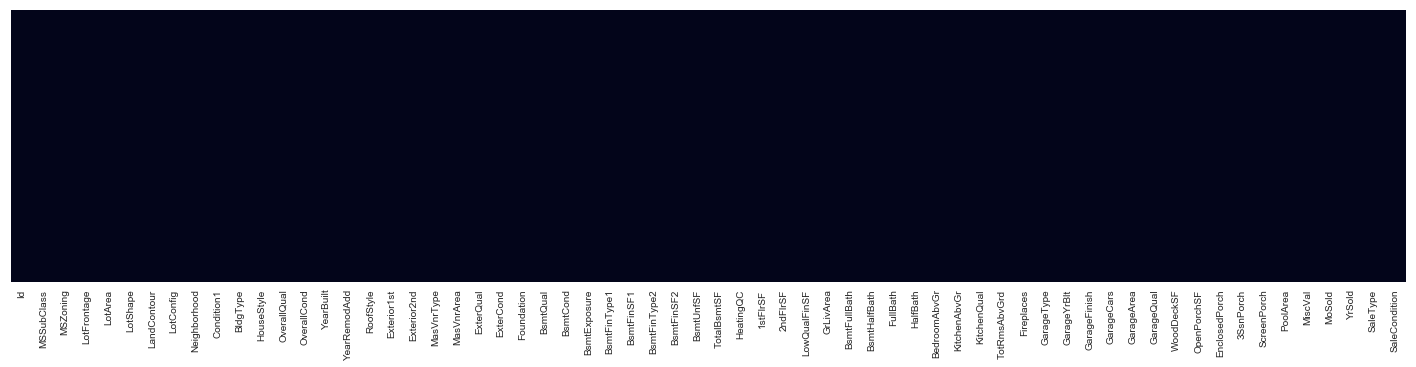

In [65]:
na_heatmap( train_X )

## Prepare Test Data

###### Data Cleansing
- Drop features with a majority missing values
- Impute numerical missing values as mean of feature missing value appears under
- Drop categorical variables where the majority of its observations are of a single category
- Impute the categorical feature values as a new categroy called `Other`
- Fill missing `GarageBlt` values
- Categorize year and month data

###### Data Standardization
- Winsorize numerical data
- Standardize the numerical data
- Transform categorical features into dummy variables

In [66]:
test_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [67]:
test_X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [68]:
test_X.drop( drop_missing_features( test_X, 0.45 ), axis = 1, inplace = True )

In [69]:
categorical_indices = get_categorical_indices( test_X )
test_X.drop( drop_majority_class_columns( test_X, categorical_indices, 0.9 ), axis = 1, inplace = True )

In [70]:
categorical_indices = get_categorical_indices( test_X )
impute_categorical( test_X, categorical_indices )

In [71]:
sorted_years       = test_X[ 'GarageYrBlt' ].sort_values()
garage_median_year = int( round( statistics.median( sorted_years ) ) )

test_X[ 'GarageYrBlt' ].fillna( garage_median_year, inplace = True )
garage_median_year

1982

In [72]:
bins  = list( set( test_X[ 'YrSold' ] ) )
names = list( map( int_list_to_string, bins ) )
convert_year_to_category( test_X, 'YrSold', bins, names )

In [73]:
bins  = [ 3, 6, 9, 12 ]
names = [ 'First', 'Second', 'Third', 'Fourth' ]
convert_year_to_category( test_X, 'MoSold', bins, names )

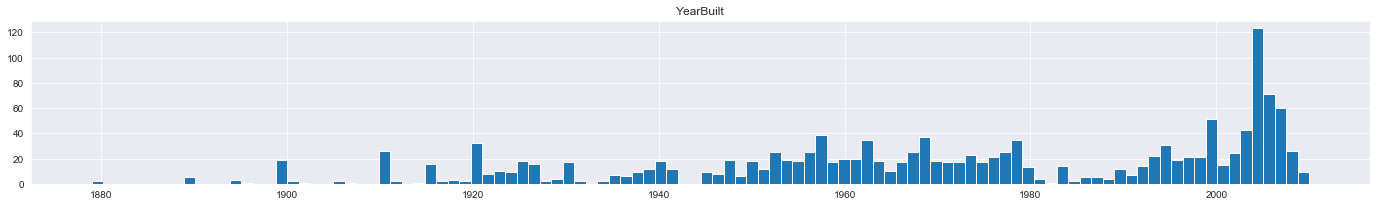

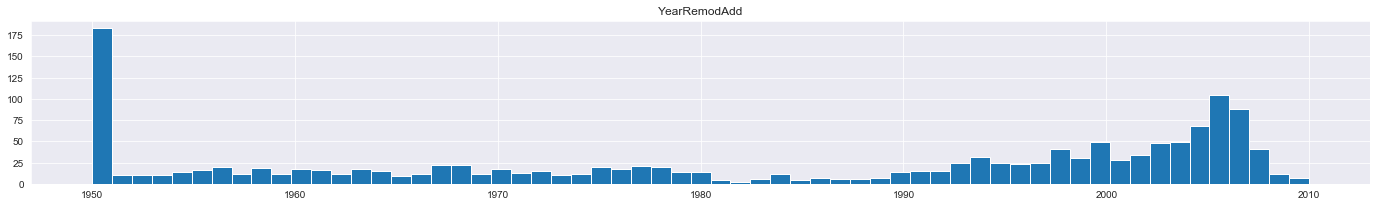

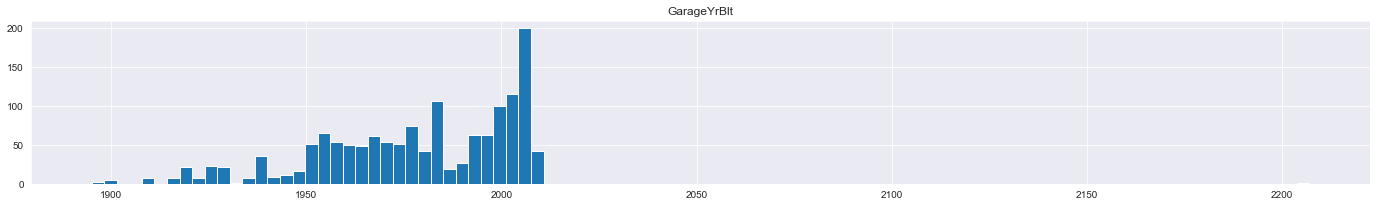

In [74]:
visualize_year_feature_dist( test_X, year_columns )

It looks like the test data had a very big outlier that could be due to imput error. The best approach is to impute this observation as the median value for that feature.

In [75]:
outlier_observation = test_X.index[ test_X[ 'GarageYrBlt' ] == max( test_X[ 'GarageYrBlt' ] ) ].tolist()

test_X[ 'GarageYrBlt' ][ outlier_observation ] =  garage_median_year

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


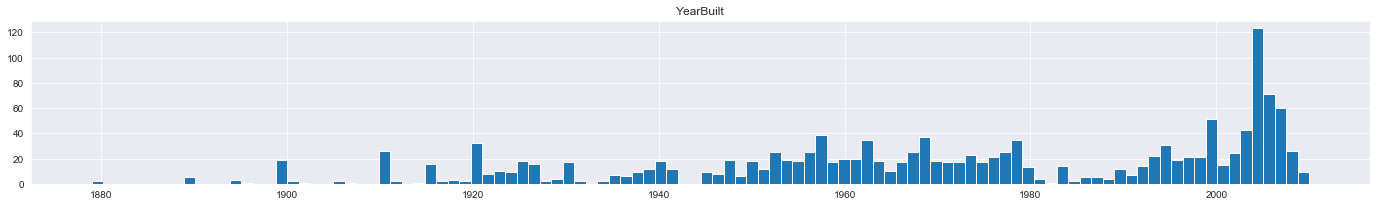

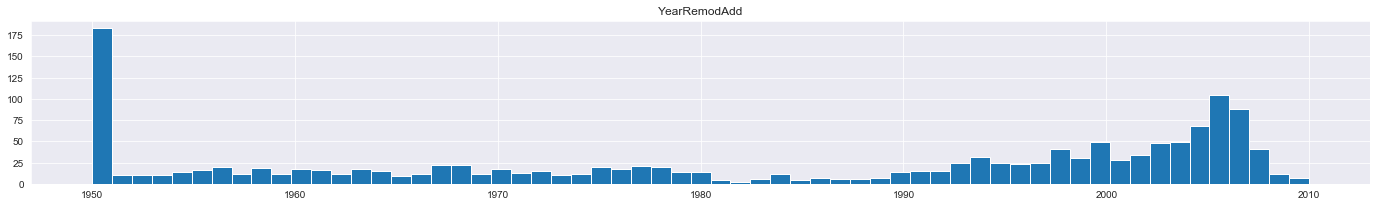

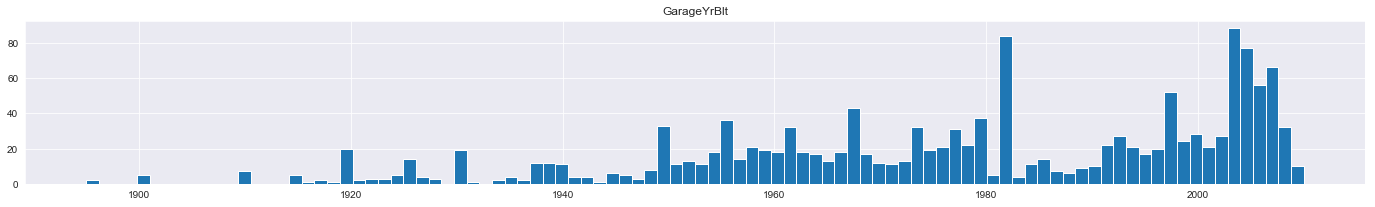

In [76]:
visualize_year_feature_dist( test_X, year_columns )

In [77]:
year_built      = [ '<1920', '1921 - 1940', '1941 - 1960', '1961 - 1980', '1981 - 2000', '2000>' ]
year_remod_add  = [ '1950',  '1951 - 1970', '1971 - 1980', '1981 - 1990', '1991 - 2000', '2000>' ]
garage_year_blt = [ '<1920', '1921 - 1945', '1946 - 1965', '1966 - 1985', '1986 - 2000', '2000>' ]

In [78]:
bins  = [ 1920, 1940, 1960, 1980, 2000, np.inf ]
names = year_built
convert_year_to_category( test_X, 'YearBuilt', bins, names )

bins  = [ 1950, 1970, 1980, 1990, 2000, np.inf ]
names = year_remod_add
convert_year_to_category( test_X, 'YearRemodAdd', bins, names )

bins  = [ 1920, 1945, 1965, 1985, 2000, np.inf ]
names = garage_year_blt
convert_year_to_category( test_X, 'GarageYrBlt', bins, names )

In [79]:
categorical_indices = get_categorical_indices( test_X )
make_dummy_features( test_X, categorical_indices )

In [80]:
numerical_indices = get_numeric_indices( test_X )
impute_numeric( test_X, numerical_indices )

In [81]:
numerical_indices = get_numeric_indices( test_X )
exempt_features   = [ 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', '3SsnPorch' ]
winsor( test_X, numerical_indices, exempt_features )

In [82]:
standard_scale( test_X, numerical_indices )

In [83]:
test_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-0.219873,0,0.106578,0.084988,0,0,0,0,1,0,0,-0.119869,0.055775,0,1,1,0,0,0,-0.154741,0,0,1,0,0,0,0,0.018310,0,0.182379,-0.153291,-0.069240,0,-0.132547,-0.207422,-0.009355,-0.239353,-0.144818,-0.032601,-0.142735,-0.188828,-0.142335,-0.021247,0,-0.115433,-0.145305,1,1,0,-0.153224,0.232531,0,0,0.102825,-0.184287,-0.099231,-0.004984,0.577556,-0.00218,-0.019038,0,0,0,0
1,1462,-0.219873,0,0.115753,0.199480,0,0,0,0,0,0,0,-0.008758,0.055775,1,1,0,0,0,1,0.019172,0,0,1,0,0,0,0,0.277126,0,-0.077081,-0.079817,0.123432,0,0.091689,-0.207422,-0.009355,-0.062474,-0.144818,-0.032601,-0.142735,0.311172,0.024332,-0.021247,0,-0.032100,-0.145305,1,1,0,-0.153224,-0.144046,0,0,0.636580,-0.042554,-0.099231,-0.004984,-0.081785,-0.00218,0.980962,0,0,0,0
2,1463,0.015422,0,0.051532,0.180564,0,0,0,0,0,0,0,-0.119869,-0.069225,0,0,1,0,0,0,-0.154741,0,0,0,0,0,0,0,0.202041,0,-0.077081,-0.225144,-0.049412,0,-0.115975,0.239930,-0.009355,0.060075,-0.144818,-0.032601,0.107265,0.311172,0.024332,-0.021247,0,-0.032100,0.104695,1,0,0,0.046776,0.009107,0,0,0.254723,-0.050428,-0.099231,-0.004984,-0.081785,-0.00218,-0.019038,0,0,0,0
3,1464,0.015422,0,0.088230,0.013825,0,0,0,0,0,0,0,-0.008758,0.055775,0,0,1,0,0,1,-0.122535,0,0,0,0,0,0,0,0.094533,0,-0.077081,-0.124117,-0.050274,0,-0.117011,0.225252,-0.009355,0.049863,-0.144818,-0.032601,0.107265,0.311172,0.024332,-0.021247,0,0.051234,0.104695,1,0,0,0.046776,-0.001703,0,0,0.566960,-0.042554,-0.099231,-0.004984,-0.081785,-0.00218,-0.019038,0,0,0,0
4,1465,0.368363,0,-0.232871,-0.201438,0,1,0,0,0,0,0,0.213464,-0.069225,0,0,1,0,0,0,-0.154741,0,0,0,0,0,0,0,-0.098300,0,-0.077081,0.250275,0.102312,0,0.066314,-0.207422,-0.009355,-0.082490,-0.144818,-0.032601,0.107265,-0.188828,-0.142335,-0.021247,0,-0.115433,-0.145305,1,0,0,0.046776,0.030729,0,0,-0.192534,0.138548,-0.099231,-0.004984,0.709424,-0.00218,-0.019038,0,0,0,0


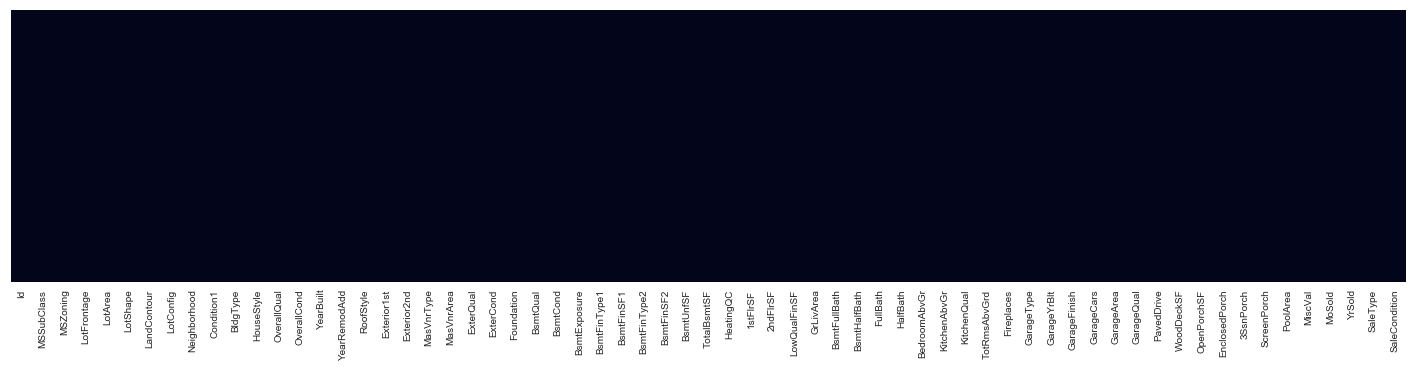

In [84]:
na_heatmap( test_X )

In [85]:
test_X.drop( [ 'PavedDrive' ], axis = 1, inplace = True )

## Fit Linear Regression Model

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
lm.fit( train_X.drop( 'Id', axis = 1 ), train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
predictions = lm.predict( test_X.drop( 'Id', axis = 1 ) )

## Create Submission

In [90]:
submission = pd.DataFrame(
    {'Id'        : test_X[ 'Id' ],
     'SalePrice' : predictions
    }
)

submission.to_csv( './submissions/submission.csv', index = False )

In [91]:
submission.head(10)

,Id,SalePrice
0,1461,116791.140389
1,1462,192313.896459
2,1463,181297.162971
3,1464,203822.321035
4,1465,216152.994065
5,1466,178932.658870
6,1467,202888.081121
7,1468,165349.111044
8,1469,240550.983291
9,1470,120796.948498


This scored an RMSE of $0.18867$ based on the grader used from Kaggle:  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard